# DL Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import credit_data
import visualkeras

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
train_data, test_data, train_label, test_label = credit_data.load_data()

train_data = train_data.todense()
test_data = test_data.todense()
train_label = utils.to_categorical(train_label)
test_label = utils.to_categorical(test_label)

print(train_data.shape, test_data.shape, train_label.shape, test_label.shape)

(15906, 67) (6818, 67) (15906, 3) (6818, 3)


In [3]:
model = models.Sequential()

model.add(layers.Dense(input_dim=67, units=256, activation=None, kernel_initializer=initializers.he_uniform()))
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(units=3, activation='softmax'))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [4]:
model.compile(optimizer=optimizers.Adam(),
            loss=losses.categorical_crossentropy, 
            metrics=[metrics.categorical_accuracy])

In [5]:
history = model.fit(train_data, train_label, batch_size=100, epochs=10, validation_split=0.3)

Epoch 1/10
112/112 [==============================] - 3s 24ms/step - loss: 1.1412 - categorical_accuracy: 0.5780 - val_loss: 0.9173 - val_categorical_accuracy: 0.6523
Epoch 2/10
112/112 [==============================] - 3s 23ms/step - loss: 0.9351 - categorical_accuracy: 0.6316 - val_loss: 0.8616 - val_categorical_accuracy: 0.6666
Epoch 3/10
112/112 [==============================] - 3s 29ms/step - loss: 0.8762 - categorical_accuracy: 0.6573 - val_loss: 0.8774 - val_categorical_accuracy: 0.6658
Epoch 4/10
112/112 [==============================] - 3s 25ms/step - loss: 0.8540 - categorical_accuracy: 0.6725 - val_loss: 0.8731 - val_categorical_accuracy: 0.6714
Epoch 5/10
112/112 [==============================] - 3s 23ms/step - loss: 0.8424 - categorical_accuracy: 0.6760 - val_loss: 0.8531 - val_categorical_accuracy: 0.6714
Epoch 6/10
112/112 [==============================] - 2s 22ms/step - loss: 0.8333 - categorical_accuracy: 0.6788 - val_loss: 0.8449 - val_categorical_accuracy: 0.672

In [6]:
result = model.evaluate(test_data, test_label)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

214/214 [==============================] - 2s 11ms/step - loss: 0.8268 - categorical_accuracy: 0.6854
loss (cross-entropy) : 0.8267838954925537
test accuracy : 0.6853916645050049


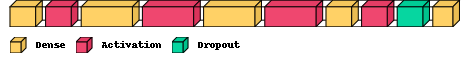

In [7]:
visualkeras.layered_view(model, legend=True)

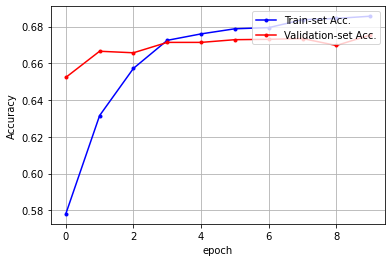

In [8]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

## All Category

In [9]:
train_data, test_data, train_label, test_label = credit_data.load_data('train_cat')

train_data = train_data.todense()
test_data = test_data.todense()
train_label = utils.to_categorical(train_label)
test_label = utils.to_categorical(test_label)

print(train_data.shape, test_data.shape, train_label.shape, test_label.shape)

(15906, 103) (6818, 103) (15906, 3) (6818, 3)


In [10]:
model = models.Sequential()

model.add(layers.Dense(input_dim=103, units=256, activation=None, kernel_initializer=initializers.he_uniform()))
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(units=3, activation='softmax'))

model.compile(optimizer=optimizers.Adam(),
            loss=losses.categorical_crossentropy, 
            metrics=[metrics.categorical_accuracy])

history = model.fit(train_data, train_label, batch_size=100, epochs=10, validation_split=0.3)

result = model.evaluate(test_data, test_label)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

Epoch 1/10
112/112 [==============================] - 3s 26ms/step - loss: 1.0660 - categorical_accuracy: 0.5939 - val_loss: 0.8887 - val_categorical_accuracy: 0.6544
Epoch 2/10
112/112 [==============================] - 3s 24ms/step - loss: 0.9160 - categorical_accuracy: 0.6392 - val_loss: 0.9037 - val_categorical_accuracy: 0.6530
Epoch 3/10
112/112 [==============================] - 3s 24ms/step - loss: 0.8729 - categorical_accuracy: 0.6631 - val_loss: 0.8713 - val_categorical_accuracy: 0.6593
Epoch 4/10
112/112 [==============================] - 3s 28ms/step - loss: 0.8577 - categorical_accuracy: 0.6636 - val_loss: 0.8719 - val_categorical_accuracy: 0.6620
Epoch 5/10
112/112 [==============================] - 3s 28ms/step - loss: 0.8393 - categorical_accuracy: 0.6714 - val_loss: 0.8641 - val_categorical_accuracy: 0.6616
Epoch 6/10
112/112 [==============================] - 3s 29ms/step - loss: 0.8298 - categorical_accuracy: 0.6697 - val_loss: 0.8572 - val_categorical_accuracy: 0.664

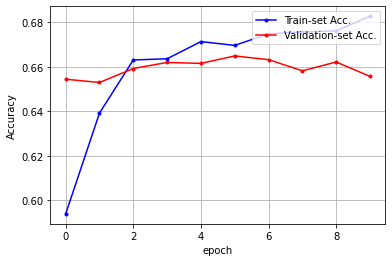

In [11]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

In [17]:
train_data, test_data, train_label, test_label = credit_data.load_data('train_cat', encoding=False)

train_data = utils.to_categorical(train_data).reshape(15906, 17*19)
test_data = utils.to_categorical(test_data).reshape(6818, 17*19)
train_label = utils.to_categorical(train_label)
test_label = utils.to_categorical(test_label)

print(train_data.shape, test_data.shape, train_label.shape, test_label.shape)

(15906, 323) (6818, 323) (15906, 3) (6818, 3)


In [18]:
model = models.Sequential()

model.add(layers.Dense(input_dim=17*19, units=256, activation=None, kernel_initializer=initializers.he_uniform()))
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(units=3, activation='softmax'))

model.compile(optimizer=optimizers.Adam(),
            loss=losses.categorical_crossentropy, 
            metrics=[metrics.categorical_accuracy])

history = model.fit(train_data, train_label, batch_size=100, epochs=10, validation_split=0.3)

result = model.evaluate(test_data, test_label)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

Epoch 1/10
112/112 [==============================] - 3s 27ms/step - loss: 1.0022 - categorical_accuracy: 0.6124 - val_loss: 0.8872 - val_categorical_accuracy: 0.6565
Epoch 2/10
112/112 [==============================] - 3s 27ms/step - loss: 0.9021 - categorical_accuracy: 0.6451 - val_loss: 0.8753 - val_categorical_accuracy: 0.6614
Epoch 3/10
112/112 [==============================] - 3s 27ms/step - loss: 0.8741 - categorical_accuracy: 0.6631 - val_loss: 0.8645 - val_categorical_accuracy: 0.6591
Epoch 4/10
112/112 [==============================] - 3s 25ms/step - loss: 0.8583 - categorical_accuracy: 0.6675 - val_loss: 0.8623 - val_categorical_accuracy: 0.6567
Epoch 5/10
112/112 [==============================] - 3s 25ms/step - loss: 0.8414 - categorical_accuracy: 0.6691 - val_loss: 0.8601 - val_categorical_accuracy: 0.6668
Epoch 6/10
112/112 [==============================] - 3s 23ms/step - loss: 0.8367 - categorical_accuracy: 0.6710 - val_loss: 0.8616 - val_categorical_accuracy: 0.657

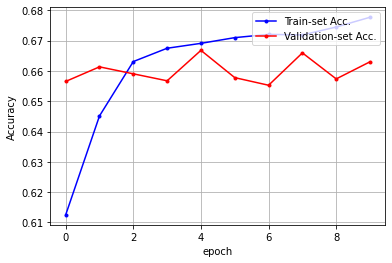

In [19]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()